Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    df = pd.read_csv(file)
    
    return df

def exercise_1(df):
    list_of_columns = list(df.columns)
    
    return list_of_columns

def exercise_2(df, k):
    first_n_rows = df.head(k)
    
    return first_n_rows

def exercise_3(df, k):
    ramdom_n_rows = df.sample(k)
    
    return ramdom_n_rows

def exercise_4(df):
    list_of_unique = list(df.type.unique())
    
    return list_of_unique

def exercise_5(df):
    list_nameDest = list(df.nameDest)
    nameDests = pd.Series(list_nameDest)
    top_10_dest_counts = nameDests.value_counts().head(10)
    
    top10_frequency_series = pd.Series(list(top_10_dest_counts.index[0:10]))
    
    return top10_frequency_series

def exercise_6(df):
    isFraud = df.loc[df['isFraud'] == 1]
    
    return isFraud

def exercise_7(df):
    dest_interact = df.groupby('nameOrig')['nameDest'].agg(['nunique'])
    dest_interact.sort_values(by=('nunique'), ascending=False, inplace=True)
    
    return dest_interact

def visual_1(df):
    pass

def visual_2(df):
    pass

def exercise_custom(df):
    pass
    
def visual_custom(df):
    pass

In [2]:
df = exercise_0('transactions.csv')

In [3]:
# Test exercises here
ex1 = exercise_1(df)
#print(ex1)
ex2 = exercise_2(df, 3)
#print(ex2)
ex3 = exercise_3(df, 3)
#print(ex3)
ex4 = exercise_4(df)
#print(ex4)
ex5 = exercise_5(df)
#print(ex5)
ex6 = exercise_6(df)
#print(ex6)
ex7 = exercise_7(df)
#print(ex7)

Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

'Upon analyzing the charts, it becomes evident that fraud incidents are primarily associated with CASH_OUT and TRANSFER transactions in the second figure. This highlights the importance of the organization prioritizing these areas to effectively reduce potential fraud.'

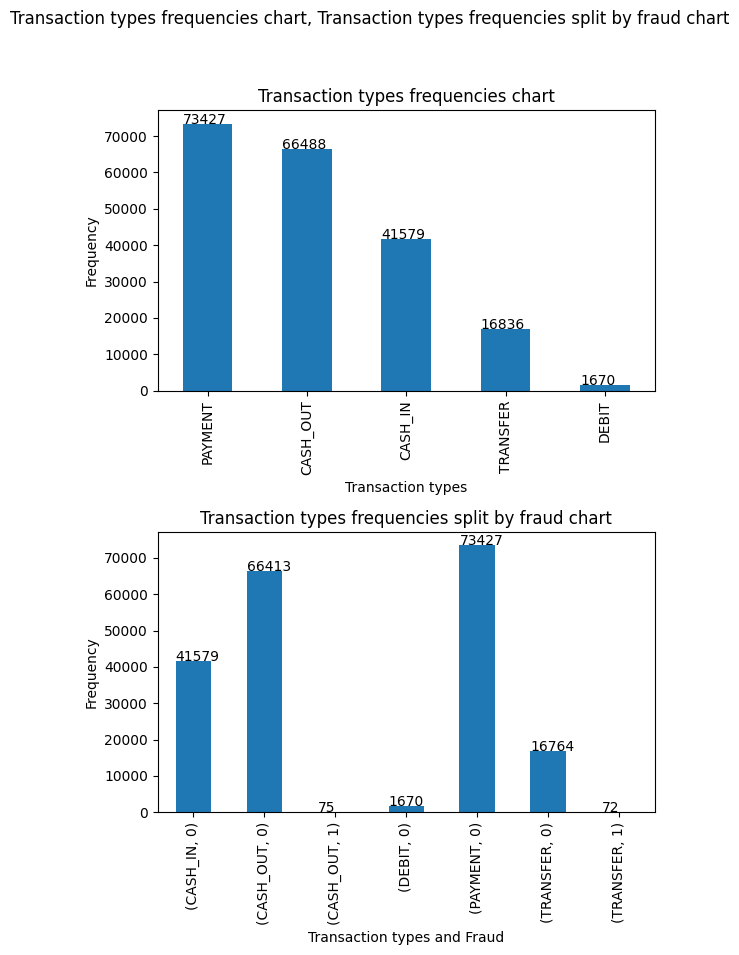

In [4]:
def visual_1(df):
    def transaction_counts(df):
        transaction_counts = df["type"].value_counts()
        
        return transaction_counts
        
    def transaction_counts_split_by_fraud(df):
        transaction_counts_by_fraud = df.groupby(by=['type', 'isFraud']).size()
        
        return transaction_counts_by_fraud

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction types frequencies chart')
    axs[0].set_xlabel('Transaction types')
    axs[0].set_ylabel('Frequency')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction types frequencies split by fraud chart')
    axs[1].set_xlabel('Transaction types and Fraud')
    axs[1].set_ylabel('Frequency')
    fig.suptitle('Transaction types frequencies chart, Transaction types frequencies split by fraud chart')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'Upon analyzing the charts, it becomes evident that fraud incidents are primarily associated with CASH_OUT and TRANSFER transactions in the second figure. This highlights the importance of the organization prioritizing these areas to effectively reduce potential fraud.'

visual_1(df)



'The figure indicates that the dataset is fundamentally sound, as the data points are predominantly clustered on the right-hand side. This is a result of the nature of CASH_OUT activity, which involves withdrawing money from accounts. The presence of the y=-x line illustrates instant settlement.'

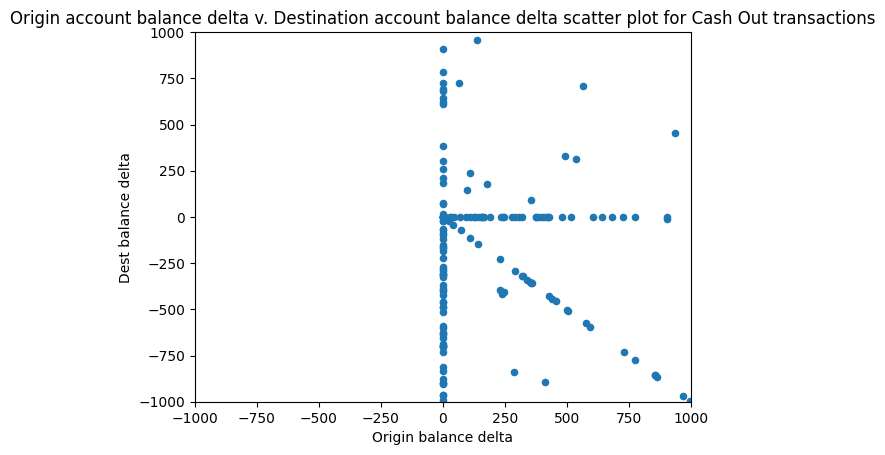

In [5]:
def visual_2(df):
    def query(df):
        df['Origin balance delta'] = df['oldbalanceOrg'] - df['newbalanceOrig']
        df['Dest balance delta'] = df['oldbalanceDest'] - df['newbalanceDest']
        new_df_with_delta = df.loc[df['type'] == 'CASH_OUT']
        
        return new_df_with_delta
    
    plot = query(df).plot.scatter(x='Origin balance delta',y='Dest balance delta')
    plot.set_title('Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return 'The figure indicates that the dataset is fundamentally sound, as the data points are predominantly clustered on the right-hand side. This is a result of the nature of CASH_OUT activity, which involves withdrawing money from accounts. The presence of the y=-x line illustrates instant settlement.'

visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

'The figure suggests that there may be some potential issues with fraud detection, as it is not effectively identifying fraudulent activities. Fortunately, the detection system is not erroneously flagging non-fraudulent activities.'

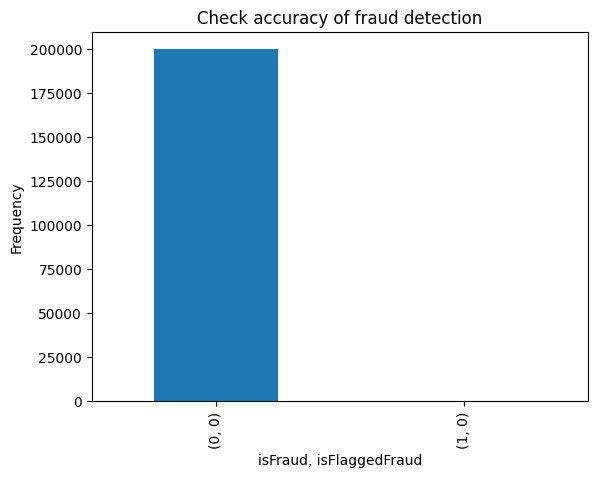

In [9]:
def exercise_custom(df):
    counts = df[['isFraud', 'isFlaggedFraud']].value_counts()
    return counts
    
def visual_custom(df):
    axs = exercise_custom(df).plot(kind='bar')
    axs.set_title('Check accuracy of fraud detection')
    axs.set_xlabel('isFraud, isFlaggedFraud')
    axs.set_ylabel('Frequency')
    
    return "The figure suggests that there may be some potential issues with fraud detection, as it is not effectively identifying fraudulent activities. Fortunately, the detection system is not erroneously flagging non-fraudulent activities."

visual_custom(df)

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.